# Projet traitement de donées

## Fonctions déja préparées

In [1]:
def csv_vers_liste(adresse, separateur, entetes, encod = "utf-8") :
    """
    Fonction important le fichier csv désigné par son adresse
    Le séparateur est fourni en argument
    Il est aussi possible de préciser l'encodage (utf-8 par défaut)
    et la présence d'entêtes dans la première ligne (celle-ci sera supprimée
    si la valeur passée est True)
    adresse est l'adresse du fichier sur le disque (string)
    separateur est le séparateur utilisé dans le fichier (string)
    entetes est un booléen indiquant si la première ligne du fichier 
    contient les entêtes des colonnes. Cette ligne sera supprimée si la 
    variable vaut True
    encod est l'encodage du fichier (utf-8 par défaut)
    Renvoie la liste de lignes du tableau
    """
    tableau = []

    with open(adresse, "r", encoding = encod) as fichier :
        for ligne in fichier :
            tableau.append(ligne[:-1].split(separateur))

    if entetes :
        tableau.pop(0)
        
    return tableau

In [2]:
def cherche(tableau, condition) :
    """
    Fonction cherchant dans le tableau donné, les lignes vérifiant la condition donnée
    tableau ets un tableau de tableau
    condition est une proposition du type "'man' in ligne[1] and ligne[-3] > 100" pour les héros 
    dont le nom contient 'man' et étant apparus plus de 100 fois
    Renvoie la liste des lignes trouvées ainsi que le nombre de lignes
    """
    
    resultat = [ligne for ligne in tableau if eval(condition)] 
    
    return resultat

In [3]:
def maxi(table, cle) :
    """
    Renvoie la ligne maximale d'une table en étudiant la valeur passée en clé
    table est une liste de liste ou de dictionnaires
    cle est une clé (str) ou un indice (int)
    Renvoie la ligne contenant le maximum et son indice (tuple)
    """
    def renvoie_valeur(l) :
        return l[cle]
    
    maximum = max(table, key = renvoie_valeur)
    indice_max = table.index(maximum)
    
    return maximum, indice_max

In [4]:
def mini(table, cle) :
    """
    Renvoie la ligne minimale d'une table en étudiant la valeur passée en clé
    table est une liste de liste ou de dictionnaires
    cle est une clé (str) ou un indice (int)
    Renvoie la ligne contenant le minimum et son indice (tuple)
    """
    def renvoie_valeur(l) :
        return l[cle]
    
    minimum = min(table, key = renvoie_valeur)
    indice_mini = table.index(minimum)
    
    return minimum, indice_mini


In [5]:
def moyenne(tableau, colonne) :
    """
    Fonction calculant la moyenne de la colonne indiquée du tableau fourni en argument
    tableau est un tableau de tableaux ou de dictionnaires. Chaque ligne contient différentes colonnes
    colonne est le numéro ou la clé de la colonne dont on veut calculer la moyenne
    Renvoie la moyenne de la colonne concernée au format float
    """
    # Préconditions (partielles)\n
    assert isinstance(tableau, list), "tableau doit être une liste"
    assert type(colonne) in [int, str], "colonne doit être un entier ou une chaîne"

    somme = 0
    for ligne in tableau :
        somme += ligne[colonne]
    return somme / len(tableau)

## Importation des données

In [6]:
listeNba = csv_vers_liste("nbaallelo.csv", ",", True)
for ligne in listeNba:
    ligne[3] = int(ligne[3])
    ligne[4] = int(ligne[4])
    ligne[6] = int(ligne[6])
    ligne[7] = int(ligne[7])
    ligne[10] = int(ligne[10])
    ligne[11] = float(ligne[11])
    ligne[12] = float(ligne[12])
    ligne[13] = float(ligne[13])

In [7]:
listeNba[0] #test

['1',
 '194611010TRH',
 'NBA',
 0,
 1947,
 '11/1/1946',
 1,
 0,
 'TRH',
 'Huskies',
 66,
 1300.0,
 1293.2767,
 40.29483,
 'NYK',
 'Knicks',
 '68',
 '1300',
 '1306.7233',
 'H',
 'L',
 '0.64006501',
 ';']

## Analyse des données

In [8]:
def nbMatch(tableau):
    """
    retourne le nombre de match
    """
    listeMatch=[ligne[1] for ligne in tableau] 
    listeMatch=list(set(listeMatch))
    return len(listeMatch)
#nbMatch(listeNba) #test

In [9]:
def nbMatchTeam(tableau, team):
    """
    retourne le nombre de match joué par la team demandée
    """
    matchTeam=cherche(tableau, f"ligne[8] == '{team}'")
    return len(matchTeam)
#nbMatchTeam(listeNba, "TRH") #test

In [10]:
def maxPoint(tableau):
    """
    retourne l'id du match, la team et le nombre de points de l'équie ayant marqué le plus de points lors d'un match.
    """
    max = maxi(tableau, 10)
    return "l'équipe " + str(max[0][8])+" a marqué "+ str(max[0][10]) + " points en 1 match contre l'équipe " + str(max[0][14])
#print(maxPoint(listeNba)) #test

In [11]:
def minPoint(tableau):
    """
    retourne l'id du match, la team et le nombre de points de l'équie ayant marqué le moins de points lors d'un match.
    """
    min = mini(tableau, 10)
    return "l'équipe " + str(min[0][8])+" a marqué "+ str(min[0][10]) + " points en 1 match contre l'équipe " + str(min[0][14])
#print(minPoint(listeNba)) #test

In [12]:
def moyPoint(tableau):
    """
    retourne la moyenne des points marqué par match
    """
    return moyenne(tableau, 10)
#moyPoint(listeNba) #test

In [13]:
def listTeam(tableau):
    """
    retourne une liste avec toutes les équipes différents présentes dans le tableau
    """
    listTeam=[ligne[8] for ligne in tableau]
    return list(set(listTeam))
for ligne in listTeam(listeNba):
    ligne = ligne.strip()
#len(listTeam(listeNba)) #test

In [14]:
def nbMatchAllTeam(tableau):
    """
    retourne chaque équipe avec son nombre de match joués
    """
    string = ""
    for i in listTeam(tableau):
        string = string + f"l'équipe {i} a joué {nbMatchTeam(tableau, i)} matchs \n"
    return string
#nbMatchAllTeam(listeNba)#test

In [15]:
def teamWithMoreLoose(tableau):
    """
    retourne l'équipe qui a perdu le plus de match
    """
    listLoose = cherche(tableau, 'ligne[20]=="L"')
    list = []
    for ligne in listLoose:
        list.append(ligne[8])
    v=0
    for i in set(list):
        n = list.count(i)
        if n>v:
            v=n
            end = f"{i} a perdu {v} match"
    return end
#teamWithMoreLoose(listeNba) #test

In [16]:
def teamWithMoreWin(tableau):
    """
    retourne l'équipe qui a gagné le plus de match
    """
    listWin = cherche(tableau, 'ligne[20]=="W"')
    list = []
    for ligne in listWin:
        list.append(ligne[8])
    v=0
    for i in set(list):
        n = list.count(i)
        if n>v:
            v=n
            end = f"{i} a gagné {v} match"
    return end
#teamWithMoreWin(listeNba) #test

In [17]:
def nbMatchWinTeam(tableau, team):
    """
    retourne le nombre de match gagné de la team 
    """
    nbMatchWin = cherche(tableau, f"ligne[8]=='{team}' and ligne[20]=='W'")
    return len(nbMatchWin)
#nbMatchWinTeam(listeNba, "BOS") #test

In [18]:
def bestRatioWM(tableau):
    """
    retourne le meilleur ratio entre le nombre de victoire d'une équipe et le nombre de match
    """
    allTeam = listTeam(tableau)
    v = 0
    end=""
    for equipe in allTeam:
        nbMatchWin = nbMatchWinTeam(tableau,equipe)
        nbMatch = nbMatchTeam(tableau,equipe)
        ratio = nbMatchWin/nbMatch
        if ratio>v:
            end = f"l'équipe {equipe} a le meilleur ratio de victoire avec {nbMatchWin}/{nbMatch} "
    return end
#bestRatioWM(listeNba) #test

## Graphique

In [19]:
#pour éviter de refaire la boucle qui prend du temps à chaques fois on met les valeurs ici (à copier coller dansgraphique() a la place des lignes 19 et 20 )
names = ['LAC', 'PHI', 'SHE', 'NOP', 'WAT', 'CHS', 'HSM', 'BAL', 'STL', 'ANA', 'MIA', 'PHO', 'SYR', 'DNR', 'CHO', 'SFW', 'INA', 'MIL', 'CHA', 'ATL', 'MNP', 'WSB', 'DEN', 'CAR', 'GSW', 'INO', 'LAS', 'ORL', 'SAS', 'NYK', 'PHW', 'DNN', 'DAL', 'NOB', 'SDA', 'MNL', 'VIR', 'CHH', 'PTP', 'CHZ', 'DLC', 'BUF', 'PTC', 'POR', 'MMS', 'CAP', 'NJN', 'WSC', 'MMF', 'AND', 'PIT', 'LAL', 'WSA', 'DNA', 'SSL', 'UTS', 'MMT', 'NOH', 'CLE', 'SDS', 'SDC', 'TRH', 'KCK', 'KEN', 'BLB', 'NYA', 'SAC', 'OAK', 'NOK', 'CLR', 'OKC', 'DTF', 'INJ', 'CHP', 'MEM', 'TEX', 'VAN', 'NYN', 'WAS', 'ROC', 'TOR', 'NJA', 'UTA', 'KCO', 'MIN', 'MLH', 'PRO', 'SAA', 'STB', 'FTW', 'SDR', 'MMP', 'DET', 'BOS', 'FLO', 'SEA', 'MNM', 'IND', 'CHI', 'HOU', 'CIN', 'BRK', 'TRI', 'NOJ']
values = [0.3905579399141631, 0.5087138760202956, 0.35384615384615387, 0.47023809523809523, 0.3064516129032258, 0.5884615384615385, 0.3270440251572327, 0.48498845265588914, 0.5468331846565566, 0.32051282051282054, 0.5221425558835934, 0.5470588235294118, 0.5643564356435643, 0.49185667752442996, 0.4024390243902439, 0.4517374517374517, 0.574739281575898, 0.5096678235002479, 0.3608374384236453, 0.49417596034696404, 0.4588235294117647, 0.46887550200803213, 0.4803743961352657, 0.5045454545454545, 0.45987570926776544, 0.48226950354609927, 0.48044692737430167, 0.49116447666515634, 0.6096728307254623, 0.4948864621251517, 0.5029686174724343, 0.1774193548387097, 0.5077995353468304, 0.5597014925373134, 0.3840304182509506, 0.5539112050739958, 0.40111940298507465, 0.48281786941580757, 0.5310734463276836, 0.3125, 0.48729792147806006, 0.3952802359882006, 0.3630952380952381, 0.5297157622739018, 0.3146067415730337, 0.5617977528089888, 0.4212317114664852, 0.5670103092783505, 0.40804597701149425, 0.5694444444444444, 0.25, 0.6171721150059079, 0.5164835164835165, 0.711340206185567, 0.4044943820224719, 0.6032064128256514, 0.26785714285714285, 0.470976253298153, 0.46062992125984253, 0.2727272727272727, 0.3780487804878049, 0.36666666666666664, 0.46099290780141844, 0.5957446808510638, 0.35974304068522484, 0.5095108695652174, 0.42604501607717044, 0.5465116279069767, 0.4695121951219512, 0.49206349206349204, 0.5990491283676703, 0.3333333333333333, 0.3, 0.225, 0.4828738512949039, 0.34831460674157305, 0.21956521739130436, 0.2682926829268293, 0.4101694915254237, 0.5705614567526556, 0.423500611995104, 0.46153846153846156, 0.5494435612082671, 0.45634920634920634, 0.39183481933364617, 0.3238434163701068, 0.27380952380952384, 0.5661764705882353, 0.5060240963855421, 0.49774436090225566, 0.36227544910179643, 0.38953488372093026, 0.48746238716148443, 0.5864598966149741, 0.42134831460674155, 0.5221313786298281, 0.6136363636363636, 0.49643281807372175, 0.5240306477826794, 0.5285340314136125, 0.4634146341463415, 0.5202952029520295, 0.4074074074074074, 0.3926829268292683]

In [20]:
def graphique():
    """
    créé le graphique
    """
    import matplotlib.pyplot as plt
    def values(tableau):
        """
        définit les valeur pour créer le graphique
        """
        values = []
        allTeam = listTeam(tableau)
        for equipe in allTeam:
            nbMatchWin = nbMatchWinTeam(tableau,equipe)
            nbMatch = nbMatchTeam(tableau,equipe)
            ratio = nbMatchWin/nbMatch
            values.append(ratio)
        return values
    names = listTeam(listeNba)
    values = values(listeNba)
    plt.figure(figsize=(40,10))
    plt.bar(names,values)
    plt.show() #création d'un diagramme en barre du ratio en fonction de l'équipe


In [21]:
#fonction finale :
def final():
    """
    fonction qui regroupe toutes les données
    cette fonction peut prendre du temps à s'executer (10 min)
    """
    print(f"Au total, il y a {nbMatch(listeNba)} match.")
    print(maxPoint(listeNba))
    print(minPoint(listeNba))
    print(f"La moyenne du nombre de points marqué par match est {moyPoint(listeNba)}.")
    print(f"Il y a en tout {len(listTeam(listeNba))} équipes différentes.")
    print(nbMatchAllTeam(listeNba))
    print(teamWithMoreLoose(listeNba))
    print(teamWithMoreWin(listeNba))
    print(bestRatioWM(listeNba))
    print("Ci-dessous un graphique représentant le ratio ,nombre de matchs gagnés/nombre de matchs joués, en foncion de l'équipe")
    graphique()
    
    

## Conclusion :

Au total, il y a 63157 match.
l'équipe DET a marqué 186 points en 1 match contre l'équipe DEN
l'équipe DNR a marqué 0 points en 1 match contre l'équipe VIR
La moyenne du nombre de points marqué par match est 102.72998242475101.
Il y a en tout 104 équipes différentes.
l'équipe VAN a joué 460 matchs 
l'équipe TEX a joué 89 matchs 
l'équipe DAL a joué 3013 matchs 
l'équipe PRO a joué 168 matchs 
l'équipe CHA a joué 812 matchs 
l'équipe CIN a joué 1230 matchs 
l'équipe PIT a joué 60 matchs 
l'équipe ORL a joué 2207 matchs 
l'équipe DNN a joué 62 matchs 
l'équipe WSA a joué 91 matchs 
l'équipe VIR a joué 536 matchs 
l'équipe SDC a joué 492 matchs 
l'équipe DNA a joué 194 matchs 
l'équipe SDA a joué 263 matchs 
l'équipe CHS a joué 260 matchs 
l'équipe MIA a joué 2371 matchs 
l'équipe SYR a joué 1111 matchs 
l'équipe SAS a joué 3515 matchs 
l'équipe BUF a joué 678 matchs 
l'équipe BOS a joué 5997 matchs 
l'équipe DTF a joué 60 matchs 
l'équipe MMS a joué 89 matchs 
l'équipe WSC a joué 291 mat

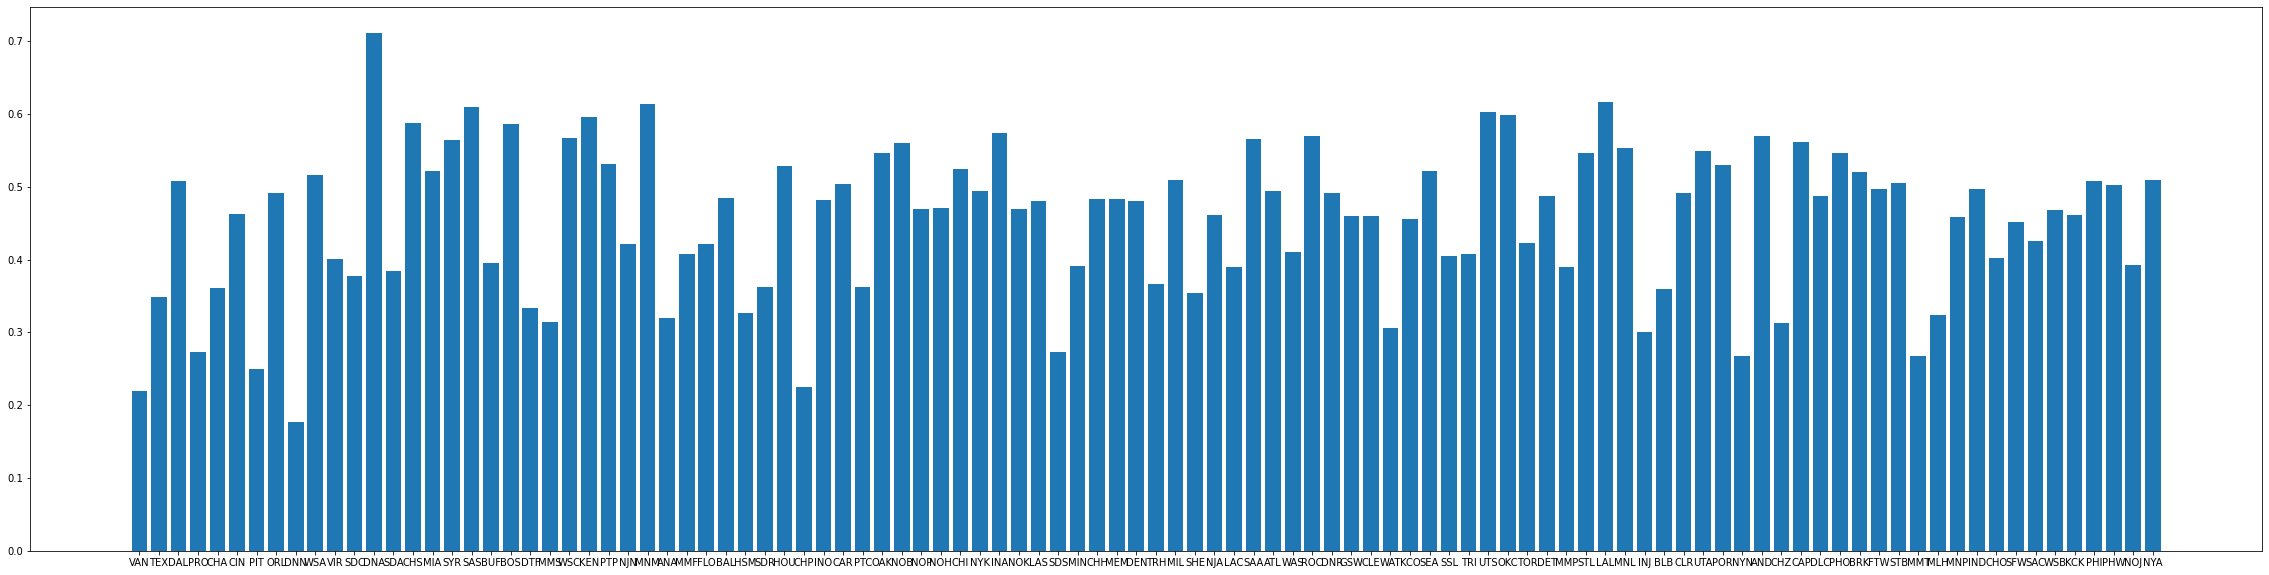

In [22]:
final()